
<img src="https://catalogo.uniandes.edu.co/-/media/Institution/Universidad-de-los-Andes/ingenieria/maestria-int-toma.ashx?la=es-ES">

    

# P2. Modelo para la estimación del precio de venta de vehículos usados

by [Daniela Carolina Sanabria, Jonny Eduardo Coronel, Oscar Mauricio Cepeda, Nestor Fabian Cholo]

version 1.0, Junio 2020
### Definición del problema:

-  Se desea construir un modelo para estimar el precio de venta de un vehículo usado teniendo en cuenta las variables: precio, año, millaje, estado (EUA), marca y modelo.

- Se cuenta con la base de datos una base de datos con 500.000 observaciones (Fuente: Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)).

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carga base de datos:

In [3]:
data = pd.read_csv('../datasets/dataTrain_carListings.zip')

In [4]:
data.head(2)

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe


In [5]:
data.shape

(500000, 6)

Indentificación de tipo de variables:

In [6]:
data.dtypes

Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

In [7]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

En la gráfica se evidencia una relación positiva entre el año del vehiculo y el precio para la muestra dada.

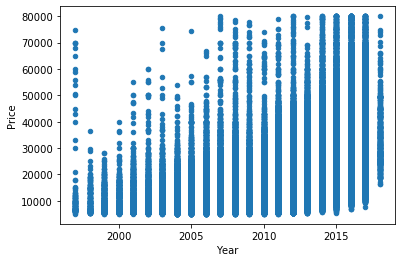

In [8]:
data.plot(kind='scatter', y='Price', x='Year')

Se identifica que al aumentar el millaje el precio de los vehículos tiende a ser menor, y se observan algunos datos fuera del rango tipico.

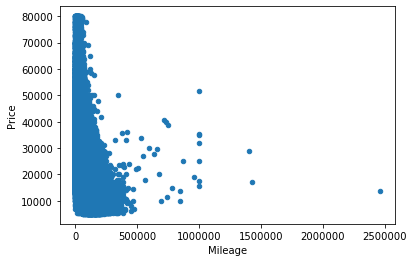

In [9]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [10]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

#### Análisis de variables

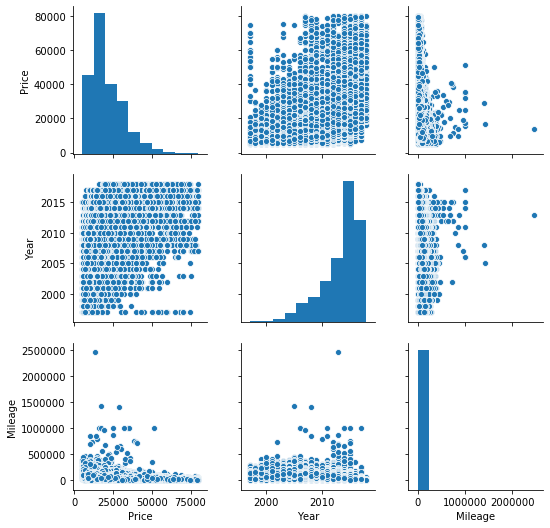

In [11]:
import seaborn as sns
sns.pairplot(data[["Price","Year", "Mileage"]])
plt.show()

- Se identifica que al aumentar el millaje el precio de los vehículos tiende a ser menor.

- En la gráfica se evidencia una relación positiva entre el año del vehiculo y el precio.

#### Mapa temático

Se realiza un mapa temático que nos permita identificar los estados con mayor número de ventas, precios y millaje promedio. 

In [52]:
# Cargue capa temática
import geopandas as gpd
usa = "USA_Car.json"
map_data = gpd.read_file(usa)
map_data.head(2)

DriverError: unsupported driver: 'ESRIJSON'

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#fig, ax = plt.subplots(figsize=(8, 8))

# Control del encuadre (área geográfica) del mapa
ax.axis([ -127,-67, 21, 52])
 
# Control del título y los ejes
ax.set_title('Número de ventas por Estado:', 
             pad = 10, 
             fontdict={'fontsize':12, 'color': '#065ed1'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
map_data.plot(column='n', cmap='YlOrRd', ax=ax,legend=True, zorder=5)

Se identifica que los estados con mayor número de ventas son: TX (57.153), CA (45.643) y FL (42.244) 

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#fig, ax = plt.subplots(figsize=(8, 8))

# Control del encuadre (área geográfica) del mapa
ax.axis([ -127,-67, 21, 52])
 
# Control del título y los ejes
ax.set_title('Precio promedio por Estado:', 
             pad = 10, 
             fontdict={'fontsize':12, 'color': '#065ed1'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
map_data.plot(column='P_price', cmap='PiYG', ax=ax,legend=True, zorder=5)

Se identifica que los estados con precios promedio de venta de vehículos usados más altos son: 

 WY	 (25.981), 
 MT	 (25.329), 
 SD	 (25.057), 
 MS	 (24.416), 
 AR	 (23.856) 

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


In [13]:
df=data.copy()

Teniendo en cuenta que las variables: State(51), Make(38) y Model(525) son categóricas, se llevará a cabo un proceso de codificación de tal manera que a cada categoría tome un valor númerico diferente. 

In [14]:
from sklearn.preprocessing import LabelEncoder

le_s = LabelEncoder()
le_s.fit(df['State'])
df['State'] = le_s.fit_transform(df['State'])
df['State']=df['State'].astype('category')

In [15]:
le_m = LabelEncoder()
le_m.fit(df['Make'])
df['Make'] = le_m.fit_transform(df['Make'])
df['Make']=df['Make'].astype('category')

In [16]:
le_k = LabelEncoder()
le_k.fit(df['Model'])
df['Model'] = le_k.fit_transform(df['Model'])
df['Model']=df['Model'].astype('category')

Se verifica que la base este codificada correctamente: 

In [17]:
df.head(4)

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,20,27,305
1,21250,2016,25741,17,6,83
2,20925,2016,24633,40,14,400
3,14500,2012,84026,36,17,248


Una vez codificada la base de datos, se crea la muestra de entrenamiento (X_train, y_train) y de evaluación (X_test, y_test) para la ejecución y calibración del modelo.

In [18]:
from sklearn.model_selection import train_test_split

X = df.loc[:,df.columns!='Price']
y = df.loc[:,['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

Primero se estimará un modelo Random Forest usando los parámetros por defecto de la librería ScikitLearn:

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfregr = RandomForestRegressor(random_state=0)
rfregr.fit(X_train, np.array(y_train).ravel())
y_pred_1 = rfregr.predict(X_test)

Una vez estimado el modelo se calculara el MSE y el R2 para evaluar la calidad del modelo:

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE = "+str(mean_squared_error(y_test, y_pred_1))+", R2 = "+str(r2_score(y_test, y_pred_1)))

MSE = 14324687.149616024, R2 = 0.8762190230903822


Posteriormente, se realiza el proceso de validación cruzada manualmente para encontrar los valores óptimos del modelo. Se llevará a cabo un proceso de 10-fold CV, en el cual la muestra de entrenamiento se dividirá en 10 partes iguales, y con solo con 9 de ellas estimará un modelo determinado. Con la muestra restante, el modelo se probará y se obtendrá un MSE. Al final, se usarán todas las 10 submuestras de prueba y se obtendrán 10 MSE por modelo. Estos valores se promediarán y con esto se obtendrá la estimación del MSE por 10-Fold CV. En el siguiente bucle, se probarán diferentes modelos con el fin de obtener los mejores parámetros de una lista preestablecida. 

In [21]:
np.random.seed(123)

cv=10
N=X_train.shape[0]

index_cv=np.array(X_train.index)
np.random.shuffle(index_cv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

n_estimators=[10] #
max_depth=[None, 5, 10]
min_samples_split=[2, 5]
max_features=['auto', 'sqrt']
mse_cv=[]

for estimator in n_estimators:
    for depth in max_depth:
        for minsample in min_samples_split:
            for features in max_features:
                
                regr=RandomForestRegressor(random_state=0, n_estimators=estimator, max_depth=depth, 
                              min_samples_split=minsample, max_features=features)
                mse=[]
                
                for fold in range(cv):

                    test_ind=np.split(index_cv, cv)[fold]
                    train_ind=[x for x in X_train.index if x not in test_ind]

                    X_test_cv=np.array(X_train.loc[test_ind, :])
                    X_train_cv=np.array(X_train.loc[train_ind, :])
                    y_test_cv=np.array(y_train.loc[test_ind, :])
                    y_train_cv=np.array(y_train.loc[train_ind, :])

                    regr.fit(X_train_cv, y_train_cv.ravel())

                    mse.append(mean_squared_error(y_test_cv, regr.predict(X_test_cv)))
                    
                mse_cv.append({'mse': np.mean(mse), 'n_estimators': estimator, 'max_depth': depth, 'min_samples_split': minsample,
                       'max_features':features})

La lista de los diferentes modelos estimados, con sus parámetros, y su MSE de 10-Fold Cross Validation es la siguiente:

In [22]:
mse_cv

[{'mse': 15132003.881609594,
  'n_estimators': 10,
  'max_depth': None,
  'min_samples_split': 2,
  'max_features': 'auto'},
 {'mse': 15778549.563118046,
  'n_estimators': 10,
  'max_depth': None,
  'min_samples_split': 2,
  'max_features': 'sqrt'},
 {'mse': 14364719.098476302,
  'n_estimators': 10,
  'max_depth': None,
  'min_samples_split': 5,
  'max_features': 'auto'},
 {'mse': 14769198.697926288,
  'n_estimators': 10,
  'max_depth': None,
  'min_samples_split': 5,
  'max_features': 'sqrt'},
 {'mse': 58364551.81535993,
  'n_estimators': 10,
  'max_depth': 5,
  'min_samples_split': 2,
  'max_features': 'auto'},
 {'mse': 63780151.495005034,
  'n_estimators': 10,
  'max_depth': 5,
  'min_samples_split': 2,
  'max_features': 'sqrt'},
 {'mse': 58364551.81535993,
  'n_estimators': 10,
  'max_depth': 5,
  'min_samples_split': 5,
  'max_features': 'auto'},
 {'mse': 63780151.495005034,
  'n_estimators': 10,
  'max_depth': 5,
  'min_samples_split': 5,
  'max_features': 'sqrt'},
 {'mse': 22141

Una vez realizado el proceso de validación cruzada, se identifica el modelo con el menor MSE:

In [23]:
print(min(d.get('mse') for d in mse_cv ))

14364719.098476302


Seguido a esto se selecciona del listado los mejores parámetros obtenidos en el proceso de iteración teniendo como parámetro el MSE:

In [24]:
res = next((sub for sub in mse_cv if sub['mse'] == 14364719.098476302), None)
res

{'mse': 14364719.098476302,
 'n_estimators': 10,
 'max_depth': None,
 'min_samples_split': 5,
 'max_features': 'auto'}

Se estima el modelo con los mejores parametros identificados:

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfregr = RandomForestRegressor(n_estimators=10,max_depth=None, min_samples_split= 5,max_features='auto')
rfregr.fit(X_train, np.array(y_train).ravel())
y_pred_1 = rfregr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE = "+str(mean_squared_error(y_test, y_pred_1))+", R2 = "+str(r2_score(y_test, y_pred_1)))

MSE = 14441438.857449053, R2 = 0.8752101605371903


## Conclusiones  

1. El modelo de Random Forest calibrado con 10-fold cross validation tiene un mejor desempeño que el modelo sin calibrar, que usa los parámetros por defecto de la función de Scikit Learn, debido a que la validación cruzada estima muchos modelos y resulta en los parámetros que optimizan el MSE. Esto es así a pesar de que en este caso, debido al costo computacional, no se pudieron estimar una gran variedad de combinaciones de parámetros. 

2. El mejor modelo calibrado con 10-fold cross validation es aquel cuyos parámetros son: 

    {'n_estimators': 10,
     'max_depth': None,
     'min_samples_split': 5,
     'max_features': 'auto'}
 
   y que resulta en un MSE de 1451135, lo cual mejora el resultado con respecto al modelo no calibrado 

3. El análisis descriptivo encuentra relaciones negativas entre el millaje y el año del modelo y el precio del vehículo. Sin embargo, estas relaciones no parecen ser lineales. 

4. Vale la pena tener en cuenta que se tenían en este caso tres variables categóricas con muchos valores diferentes entre sí. En un principio, intentamos crear una dummy para cada opción, con lo cual el dataset final quedaba con más de 600 variables. Intentamos una reducción de dimensionalidad con análisis de componentes principales. Sin embargo, por facilidad de interpretación y de deployment, se decidió codificar las variables. 



# Exercise P2.2 (50%)

Create an API of the model.



#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


## 1. Screenshots del modelo haciendo las predicciones en la máquina local

En los siguientes Screenshots se muestra la interacción de la API. En particular, se estima el precio de una caminoneta usada Hyundai Santa de modelo 2009, con un millaje de 3939, en el estado de Maryland. De acuerdo con los datos, esta camioneta costaría cerca de 13.000 USD. 

<img src="https://github.com/PajarodeMadera/G5.-Modelos-Avanzados/blob/master/local1.jpeg?raw=true">


<img src="https://github.com/PajarodeMadera/G5.-Modelos-Avanzados/blob/master/local2.jpeg?raw=true">

<img src="https://github.com/PajarodeMadera/G5.-Modelos-Avanzados/blob/master/local3.jpeg?raw=true">

Este auto sería visualmente así: 

<img src="https://m.media-amazon.com/images/I/71D-mYF5KmL._UY560_.jpg">

El código utilizado para lo anterior fue lo siguiente:

In [38]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [39]:
joblib.dump(rfregr, 'model_deployment_car/car_regr.pkl', compress=3)

['model_deployment_car/car_regr.pkl']

In [40]:
joblib.dump(le_s, 'model_deployment_car/le_s.pkl', compress=3)

['model_deployment_car/le_s.pkl']

In [41]:
joblib.dump(le_m, 'model_deployment_car/le_m.pkl', compress=3)

['model_deployment_car/le_m.pkl']

In [42]:
joblib.dump(le_k, 'model_deployment_car/le_k.pkl', compress=3)

['model_deployment_car/le_k.pkl']

In [43]:
from model_deployment_car.m10 import valores

In [44]:
valores(2005,31909,'MD','Nissan','MuranoAWD')

array([10221.26345238])

In [45]:
from flask import Flask
from flask_restplus import Api, Resource, fields
from sklearn.externals import joblib

In [46]:
app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Modelo de estimación del precio de los autos API',
    description='Prediction del Precio  API')

ns = api.namespace('predict', 
     description='Prediccion del precio de los autos')
   
parser = api.parser()

parser.add_argument(
    'Year', 
    type=str, 
    required=True, 
    help='URL to be analyzed', 
    location='args')

parser.add_argument(
    'Mileage', 
    type=str, 
    required=True, 
    help='URL to be analyzed', 
    location='args')

parser.add_argument(
    'State', 
    type=str, 
    required=True, 
    help='URL to be analyzed', 
    location='args')

parser.add_argument(
    'Make', 
    type=str, 
    required=True, 
    help='URL to be analyzed', 
    location='args')

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='URL to be analyzed', 
    location='args')


resource_fields = api.model('Resource', {
    'result': fields.String,
})

In [47]:
@ns.route('/')
class PhishingApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
       
        return {
         "result": valores(args['Year'], args['Mileage'], args['State'], args['Make'], args['Model'])}, 200

In [ ]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jun/2020 21:24:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 21:24:17] "GET /swagger.json HTTP/1.1" 200 -
